# Job Description Notebook

The purpose of this project was to explore job postings for common tech fields. Although we certainly could expand the scraping we initially scraped for:
* Data Scientist
* Data Analyst
* Data Engineer
* Front End Developer
* Back End Developer
* Fullstack Developer

We scraped from numerous big tech cities including:
* San Francisco
* Denver
* New York
* Seattle
* Portland 

Our initial goal was to determine what the most important and desired skills, packages, tech, etc. were from each field. However, it developed into an interesting project in determining how different some of these fields are actually from each other.

The web scraping was done by Leo Walker (https://github.com/leowalker89).

### Imports

In [1]:
import pandas as pd
import my_nlp_lib as my_lib
import spacy
import numpy as np
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

### Load spacy
Spacy is similar to NLTK but a lot faster and I think it provides a lot better results. 

In [2]:
nlp = spacy.load('en')

### Load data into pandas

In [3]:
df = pd.read_csv("multi_job_info1.csv", header = 1, encoding = 'latin-1')

In [4]:
df.head(5)

,1,category,title,company,location,date,job_desc
0,2,data scientist,"Data Scientist,","Cybercoders,","san-diego,california,",11/7/17,Data Scientist If you are a Data Scientist wi...
1,3,data scientist,"Data Scientist Intern,","Cybercoders,","san-diego,california,",11/7/17,Data Scientist Intern If you are looking to s...
2,4,data scientist,"Data Scientist,","Tealium,","san-diego,california,",11/7/17,WHO WE ARETealium is the leader in real time ...
3,5,data scientist,"Data Scientist,","GDIT,","san-diego,california,",11/7/17,General Dynamics Health Solutions ARMA would ...
4,6,data scientist,"Senior Data Scientist,","Hookit,","san-diego,california,",11/7/17,Senior Data ScientistAt Hookit we help brands...


Alright the strings aren't the cleanest but for our purposes they look fine. There is a structure to the data, so lets shuffle it and view another section. 

In [5]:
shuffled_df = df.sample(frac = 1, random_state = 42)
shuffled_df.head(10)

,1,category,title,company,location,date,job_desc
1429,1431,back end developer,"Web Developer,","ISO International,","san-diego,california,",11/7/17,We are seeking a Web Developer to join our te...
231,233,data scientist,"Data Scientist - Marketing Cloud,","Oracle,","orlando,florida,",11/7/17,Designs develops and programs methods process...
2019,2021,full stack developer,"Web Developer,","Kelly,","orlando,florida,",11/7/17,Kelly Services is actively seeking a Full Sta...
297,299,data scientist,"Machine Learning Engineer / Data Scientist,","BetterCompany,","san-francisco,california,",11/7/17,BetterCompany is looking for a highly motivat...
2053,2055,full stack developer,"Full-Stack Web Developer; US Citizen,","CGS Staffing,","houston,texas,",11/7/17,We are looking for a Full Stack Developer to ...
298,300,data scientist,"Data Scientist - Contract,","Cybercoders,","san-francisco,california,",11/7/17,Data Scientist Contract Data Scientist 6 mont...
1837,1839,full stack developer,Senior Full Stack Software Development Enginee...,"Zillow,","seattle,washington,",11/7/17,About the roleFinding the right place to rent...
719,721,data analyst,"Data Analyst,","Silverspring,","san-diego,california,",11/7/17,Job Description Silver Spring Networks is loo...
70,72,data scientist,Cloud DATA SCIENTIST - Big Data Platform Team ...,"Oracle,","denver,colorado,",11/7/17,Provides direction and specialist knowledge i...
1483,1485,back end developer,"Principal Software Engineer - Backend,","Highspot,","seattle,washington,",11/7/17,We are a community of engineers working at th...


This reveals some more cleaning, we have some empty strings that must not have had a result in the scrape search query these returned title, company, location, job_desc for results.
Lets clean those and drop the first column. Lets also clean location and strip the commas where we can.

In [6]:
title_dropped= shuffled_df[shuffled_df['title'] != 'title'].drop('1', axis = 1)
title_dropped['location'] = title_dropped['location'].str.strip(',').str.replace(repl= ', ', pat = ',')
title_dropped['title'] = title_dropped['title'].str.strip(',')
title_dropped['company'] = title_dropped['company'].str.strip(',')
cleaned_df = title_dropped.copy()
label_dict = {'front end developer' : 0,
              'data scientist' : 1,
              'back end developer' : 2,
              'data analyst' : 3,
              'data engineer' : 4,
              'full stack developer' : 5}


cleaned_df['num_labels'] = cleaned_df['category'].map(label_dict)

In [7]:
cleaned_df.head(10)

,category,title,company,location,date,job_desc,num_labels
1429,back end developer,Web Developer,ISO International,"san-diego, california",11/7/17,We are seeking a Web Developer to join our te...,2
231,data scientist,Data Scientist - Marketing Cloud,Oracle,"orlando, florida",11/7/17,Designs develops and programs methods process...,1
2019,full stack developer,Web Developer,Kelly,"orlando, florida",11/7/17,Kelly Services is actively seeking a Full Sta...,5
297,data scientist,Machine Learning Engineer / Data Scientist,BetterCompany,"san-francisco, california",11/7/17,BetterCompany is looking for a highly motivat...,1
2053,full stack developer,Full-Stack Web Developer; US Citizen,CGS Staffing,"houston, texas",11/7/17,We are looking for a Full Stack Developer to ...,5
298,data scientist,Data Scientist - Contract,Cybercoders,"san-francisco, california",11/7/17,Data Scientist Contract Data Scientist 6 mont...,1
1837,full stack developer,Senior Full Stack Software Development Enginee...,Zillow,"seattle, washington",11/7/17,About the roleFinding the right place to rent...,5
719,data analyst,Data Analyst,Silverspring,"san-diego, california",11/7/17,Job Description Silver Spring Networks is loo...,3
70,data scientist,Cloud DATA SCIENTIST - Big Data Platform Team ...,Oracle,"denver, colorado",11/7/17,Provides direction and specialist knowledge i...,1
1483,back end developer,Principal Software Engineer - Backend,Highspot,"seattle, washington",11/7/17,We are a community of engineers working at th...,2


This looks a lot better, I'm happy with this. Given more time I'd like to strip the company name from the job description if it's there, but that will take some thinking. Instead I'll probably just make company names stop words later.





Now lets add all of the job descriptions to a corpus and the company names to a stop list, we will replace spaces with underscores, it won't catch all of them but hopefully it will get most.

In [8]:
corpus = list(cleaned_df['job_desc'])
companys_add_stoplist = list(cleaned_df['company'].str.lower())

The below function processes and clean each description in the corpus. It:
* Strips punctuation
* Removes unicode
* Runs the doc through spacy
* Lemmatizes and tokens all words
* Keeps only Adjectives, Adverbs, Nouns, Proper Nouns, and Verbs (may change later)
* Removes stop words and rejoins as strings.

I have already prebuilt the stop words based on iterations of this model. A common problem was removing a lot of equal opportunity employment requirements. Although certainly important not necessarily useful for this project.


In [9]:
clean_corpus = [my_lib.process_string(doc, stoplist = companys_add_stoplist) for doc in corpus]

Lets do a quick comparison of before and after:

Before:

In [10]:
corpus[42]

' Data Center Network Engineering ConsultantJob Summary The project scope will be to integrate a newly acquired company into our 2 main data center locations The job responsibilities will include working with network hardware vendors Telco Service Providersand client technology departments to provide a seamless transition of services for our new clientbase Job Functions Ability to alter device configuration for logical or physical changes to maintain service integrity Perform Routing Switching Network upgrades and configuration Coordinate with vendors and technology partners to insure proper physical layer connectivity Perform circuit turn up testing and handoff to operations team for acceptance Create and update as built documentation and Visio diagrams Implement configurations or compliance changes with HPNA NCM or NCS scripts Executes with quality while completing tasks on time and on budget Proactively engaged to identify opportunities and implement enhancements of data network Eng

After:

In [11]:
clean_corpus[42]

'center network engineering consultantjob summary project scope integrate newly acquire main datum center responsibility network hardware vendor telco providersand technology department seamless transition clientbase function alter device configuration logical physical maintain integrity perform routing switching network upgrade configuration coordinate vendor technology insure proper physical layer connectivity perform circuit turn testing handoff operation acceptance create update documentation visio diagram implement configuration hpna ncm ncs script execute quality task budget proactively engage identify implement enhancement datum network engage implementation critical infrastructure platform theoperation small branch center campus datacenter level internal effectively communicate highly technical option operational project relate assignment responsible overall network troubleshooting internal networkrequired center network engineering ccnp ccna certification equivalent strong kno

Okay well that actually looks pretty good, it looks like we've captured the important words and gotten rid of the unimportant words, at least for our scenario. 

Great now lets copy it so that if while we are working with it we screw something up we don't have to clean it all over again. and then run it through a vectorizer. This vectorizer uses sklearns tfidfvectorizer or the countvectorizer depending on use case it then returns the vocabulary and the vectorizer for use in NMF. The NMF is simply sklearns NMF class

In [12]:
np.random.seed(12345)
working_corpus = clean_corpus.copy()
vectorizer, vocabulary = my_lib.build_text_vectorizer(working_corpus,
                             use_tfidf=True,
                             max_features=2000)
word_mat = vectorizer(working_corpus)

# Find latent topics using our NMF model.
factorizer = NMF(n_components=6, alpha=0.5, l1_ratio=0.1, verbose=0)
W = factorizer.fit_transform(word_mat)
H = factorizer.components_

To view the topics we can simply run a loop over the sorted arguments of the most influential features for each vector, then use those indexes to fetch the words from the vocab list.

In [13]:

for i, row in enumerate(H):
        num_words = np.argsort(row)[::-1][:50]
        print ('Topic', i)
        print (' '.join(vocabulary[num_words]), '\n')

Topic 0
web end developer javascript css html design development website user php application responsive mobile code browser jquery html5 ui ux understanding css3 content framework creative page knowledge interface project create designer angular cross strong technology develop marketing bootstrap react standard js digital wordpress platform graphic maintain photoshop compatibility stack implement 

Topic 1
machine scientist learning science datum model learn statistical analytic predictive python technique algorithm insight advanced analysis problem research quantitative modeling statistics marketing engineering deep algorithms mining lead ml large computer language solve mathematics method statistic processing phd develop unstructured visualization ai physics tool tensorflow sas field experiment optimization spark states 

Topic 2
software development application design technology java technical stack test agile engineer web develop architecture cloud code framework engineering devel

Alright well this topics actually look pretty good. Based on this information I would hypothesize that:
* Topic 0 = Front End Developer
* Topic 1 = Data Scientist
* Topic 2 = Back End Developer
* Topic 3 = Data Analyst
* Topic 4 = Data Engineer
* Topic 5 = Full Stack (maybe, software programmer)

Lets create some labels and do some exploration.

In [14]:
labels = W.argmax(axis=1)
for i in range(0, W.shape[1]):
    print ("Topic {} contains {} documents.".format(i, np.sum(labels == i)))

Topic 0 contains 511 documents.
Topic 1 contains 251 documents.
Topic 2 contains 520 documents.
Topic 3 contains 457 documents.
Topic 4 contains 183 documents.
Topic 5 contains 112 documents.


In [15]:
real_labels = cleaned_df['num_labels'].ravel()

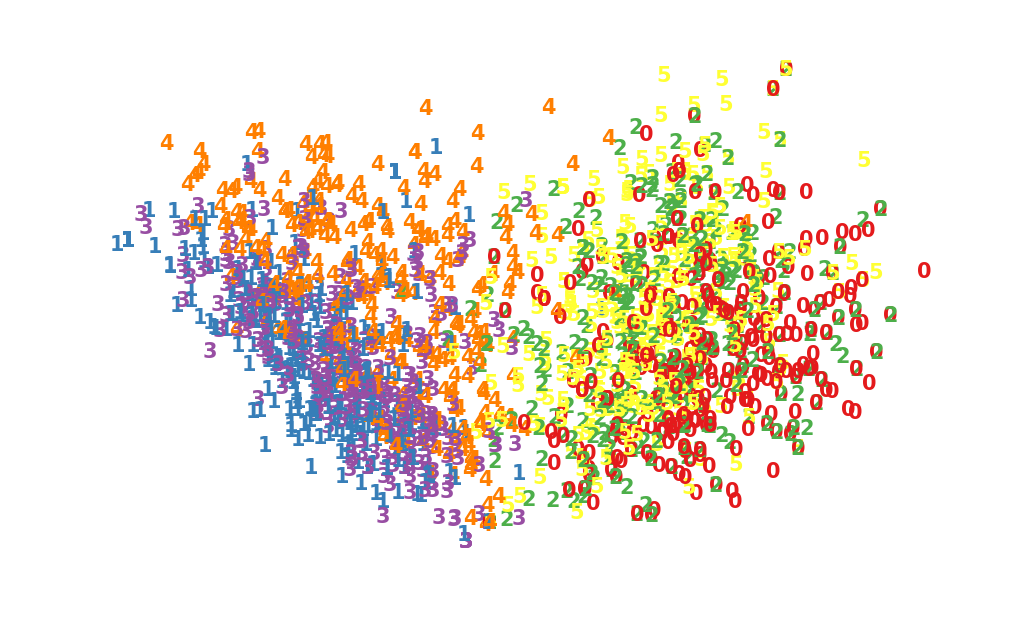

In [16]:
pca = PCA(n_components = 15)
transform_mat = pca.fit_transform(word_mat)
my_lib.plot_embedding(transform_mat, real_labels)
plt.show()

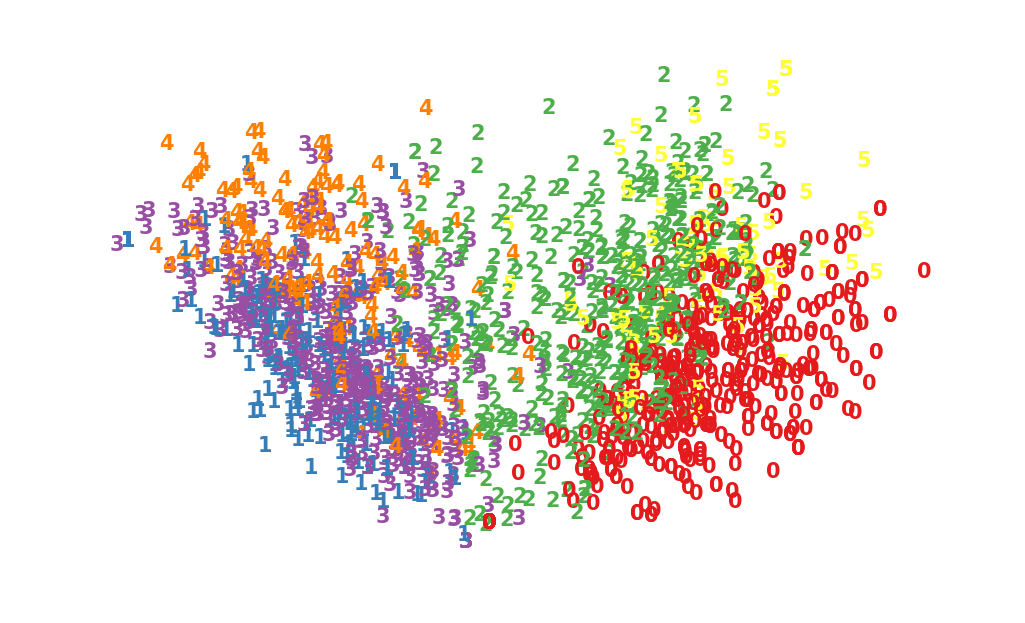

In [17]:
pca = PCA(n_components = 15)
transform_mat = pca.fit_transform(word_mat)
my_lib.plot_embedding(transform_mat, labels)
plt.show()

This is interesting! First of all it appears that although we scraped an equal amounts of each job by classifier, topic modeling, suggests that there are clearly more people looking for web development jobs (either front end (0) or back end (2)). Based on the embedded PCA reduced plot, color aside, there is perhaps two groups. A left and a right group. Using the colors as categories this plot actually provides a lot of information. Assuming 0's and 2's are web developers, there appears to be a wide range of descriptions. Similarly if I'm correct in hypothesizing that 5 is full stack, there is certainly a logical overlap. Looking at the 'data fields. We also see some interesting stuff. First off all of the data fields(1, 3, 4) are clustered on the left of the plot. This suggest there is certainly a difference in requested skills and descriptions between 'data' folk and 'web' folk. Further more it looks as if data science (1) is nested with analytics almost as if data science is specialized subset of skills of data analytics, which once again is logical. The data engineers (4) are nested somewhere in between back end(2 ) and the data analyst/scientist (1,3) jobs. This once again is a somewhat logical conclusion. If I can get the original identification of the title we scraped I would certainly like to compare the before and after.

##Want to discuss differences between real_labels and classified labels


In [18]:
# tsne = TSNE(verbose = 1)
# transform_mat = tsne.fit_transform(X)
# my_lib.plot_embedding(transform_mat, labels)
# plt.show()

TSNE showed a similar conclusion, but it is nowhere near as clear. 

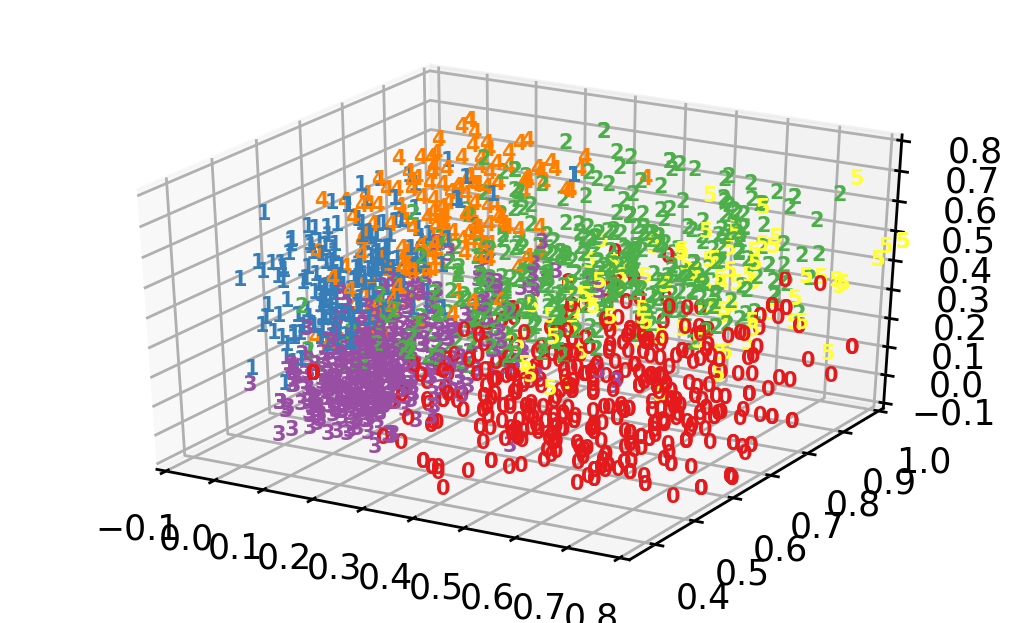

In [19]:
pca = PCA(n_components = 15)
transform_mat = pca.fit_transform(word_mat)
my_lib.plot_embedding3d(transform_mat, labels)
plt.savefig('image.png')
plt.show()

Adding a third component begins to separate the 1's, 4's and 3's, but not by much. This can be seen better in plotly representations in the attached file 'job_descriptions_label.html'. For whatever reason matplotlibs Set1 didn't show colors for 4 and 5 so I had to use a different colormap. 

In [20]:
my_lib.plot_embedding3dplotly(transform_mat, labels, filename = 'job_descriptions_label.html')

#this will take awhile to load

Now lets only view the data science jobs classified by the topic modeler I created.

In [21]:
mask = labels == 1
corpus_array = np.array(working_corpus)
ds_corpus = list(corpus_array[mask])
vectorizer, vocabulary = my_lib.build_text_vectorizer(ds_corpus,
                             use_tfidf=True,
                             max_features=500)
word_mat = vectorizer(ds_corpus)

# Find latent topics using our NMF model.
factorizer = NMF(n_components=1, alpha=0.5, l1_ratio=0.2, verbose=0)
new_W = factorizer.fit_transform(word_mat)
new_H = factorizer.components_
new_labels = new_W.argmax(axis=1)

In [22]:
for i, row in enumerate(new_H):
        num_words = np.argsort(row)[::-1][:100]
        print ('Topic', i)
        print (' '.join(vocabulary[num_words]), '\n')

Topic 0
datum science machine scientist model learn analysis analytic learning develop problem technical development lead engineering technology statistical insight tool marketing large advanced technique research python knowledge software computer application process solve complex design strong predictive engineer cloud language platform modeling algorithm project source degree implement quantitative analyze sql set write deep processing field mining create hadoop identify decision communication database information analytics management statistics spark programming organization need method program algorithms understand relate area java analytical statistic scale communicate senior ml sas related visualization understanding market improve innovative result level code mathematics user focus highly expert sale unstructured optimization manager 

